# Prediction of Price
     1. Actual price of NEVs and conventional vehicles in the future market by manufacture
     
     2. The cost/save of driving in the future

In [21]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.graph_objs as go
import plotly.express as px
import matplotlib
import numpy as np
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots

## Load the dataset

In [22]:
SAVE = '../Processed_Data/Save_money.csv'
Price = '../Processed_Data/Vehicle_Dataset.csv'

In [23]:
df_save = pd.read_csv(SAVE)
df_price = pd.read_csv(Price)

### Actual price of NEVs and conventional vehicles in the future market by manufacture

In [24]:
df_price

,Unnamed: 0,Maker,Genmodel,Year,Price,Gas_emission,Fuel_type,Engine_size
0,0,Abarth,124 spider,2016,29365,148,Petrol,1368
1,1,Abarth,124 spider,2016,31365,153,Petrol,1368
2,2,Abarth,124 spider,2017,29365,148,Petrol,1368
3,3,Abarth,124 spider,2017,31365,153,Petrol,1368
4,4,Abarth,124 spider,2017,26665,148,Petrol,1368
...,...,...,...,...,...,...,...,...
335557,335557,Volvo,Xc40,2018,35250,163,Petrol,1969
335558,335558,Volvo,Xc40,2018,36750,166,Petrol,1969
335559,335559,Volvo,Xc40,2018,29200,144,Petrol,1477
335560,335560,Volvo,Xc40,2018,33350,161,Petrol,1969


## For this data, we will group them according to year and find their average price. Also, divide them into new energy vehicles as well as conventional vehicles according to their fuel type.

In [25]:
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Diesel','Not_NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Petrol','Not_NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Other','NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Electric Diesel REX','NE')

In [26]:
df_price.drop(columns=['Unnamed: 0','Maker','Genmodel','Gas_emission','Engine_size'])

,Year,Price,Fuel_type
0,2016,29365,Not_NE
1,2016,31365,Not_NE
2,2017,29365,Not_NE
3,2017,31365,Not_NE
4,2017,26665,Not_NE
...,...,...,...
335557,2018,35250,Not_NE
335558,2018,36750,Not_NE
335559,2018,29200,Not_NE
335560,2018,33350,Not_NE


### Making a comparison of price trends between new energy vehicles and conventional vehicles in recent years

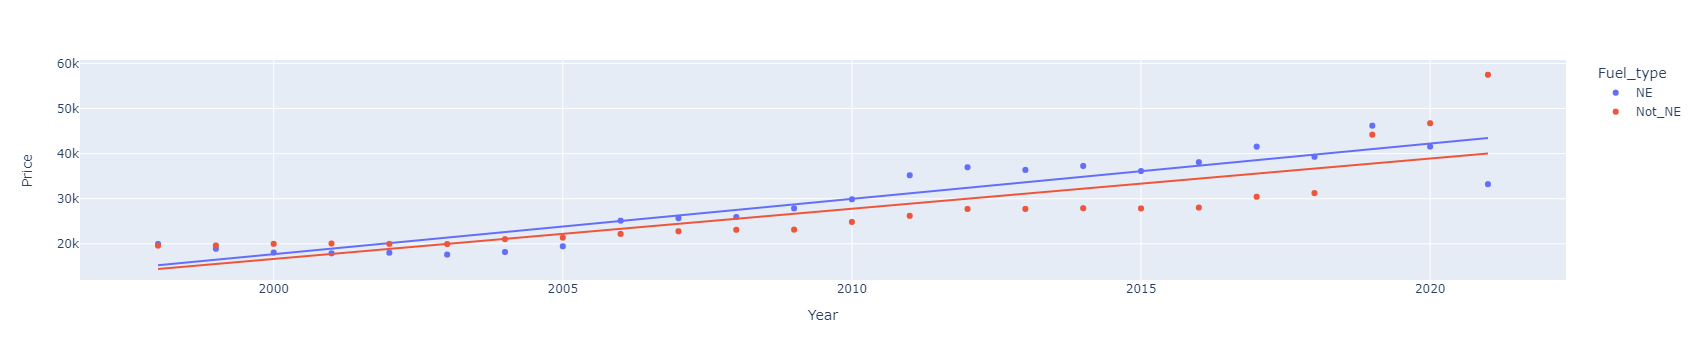

In [27]:
group = df_price.groupby(['Year','Fuel_type']).agg({'Price': 'mean'})
group = group.reset_index()
fig = px.scatter(group, x="Year", y="Price", color='Fuel_type',trendline='ols')
fig.show()

In [28]:
group.head()

,Year,Fuel_type,Price
0,1998,NE,19970.746269
1,1998,Not_NE,19600.636836
2,1999,NE,18905.921053
3,1999,Not_NE,19633.790715
4,2000,NE,18072.250000


### Make a boxplot to see how they compare overall.

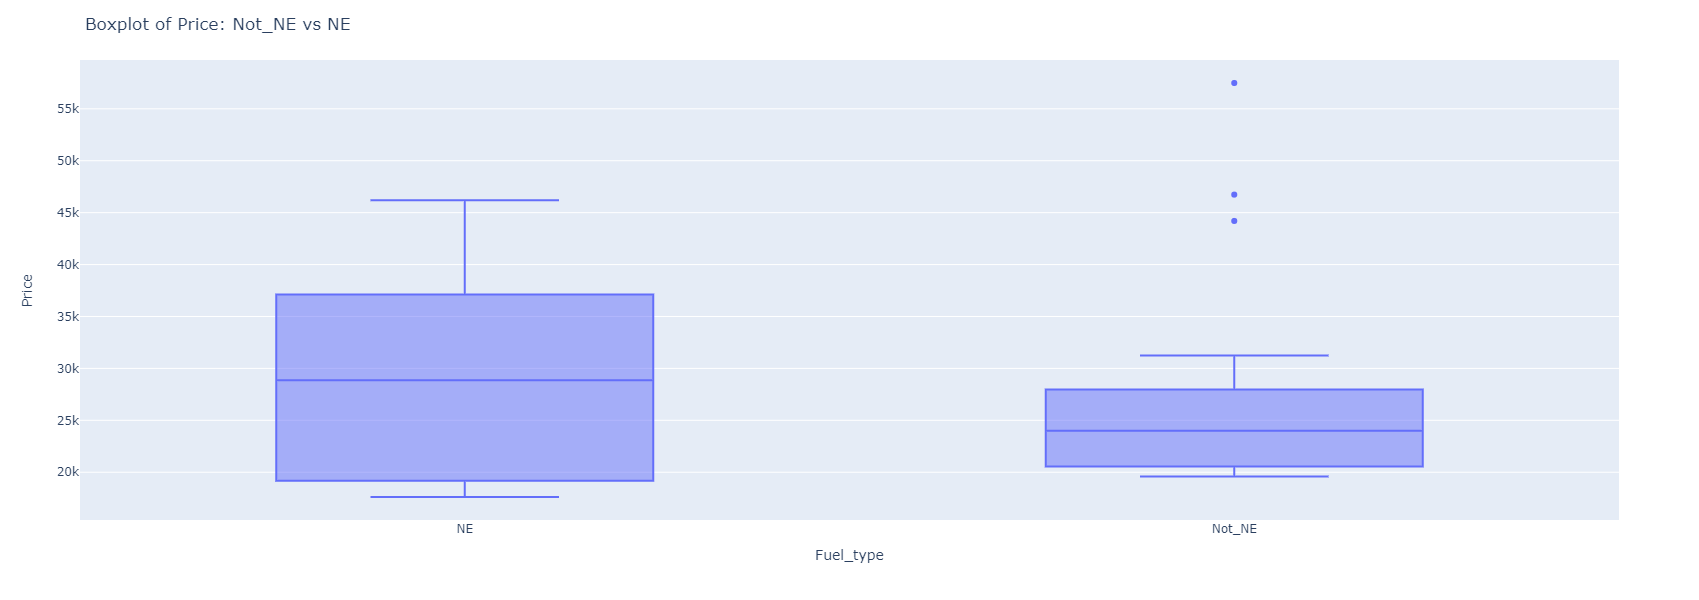

In [29]:
fig = px.box(group, x="Fuel_type", y="Price")
fig.layout.update(
    width=1000,
    height=600,
    title_text = 'Boxplot of Price: Not_NE vs NE')
fig.show()

## The cost/save of driving in the future

In [31]:
df_save.head()

,Year,cost_of_gas,cost_of_EV,cost_of_PHEV,cost_of_FCV,Avg_NE
0,2014,2570.443144,620.000000,1315.000000,1400.0,1111.666667
1,2015,2532.294165,597.222222,1520.833333,1700.0,1272.685185
2,2016,2147.732894,664.516129,1311.111111,1475.0,1150.209080
3,2017,1794.774920,645.000000,1131.578947,1400.0,1058.859649
4,2018,1778.682171,618.750000,1213.235294,1250.0,1027.328431


Firstly, a grouped bar chart is used to show the annual cost of each fuel.

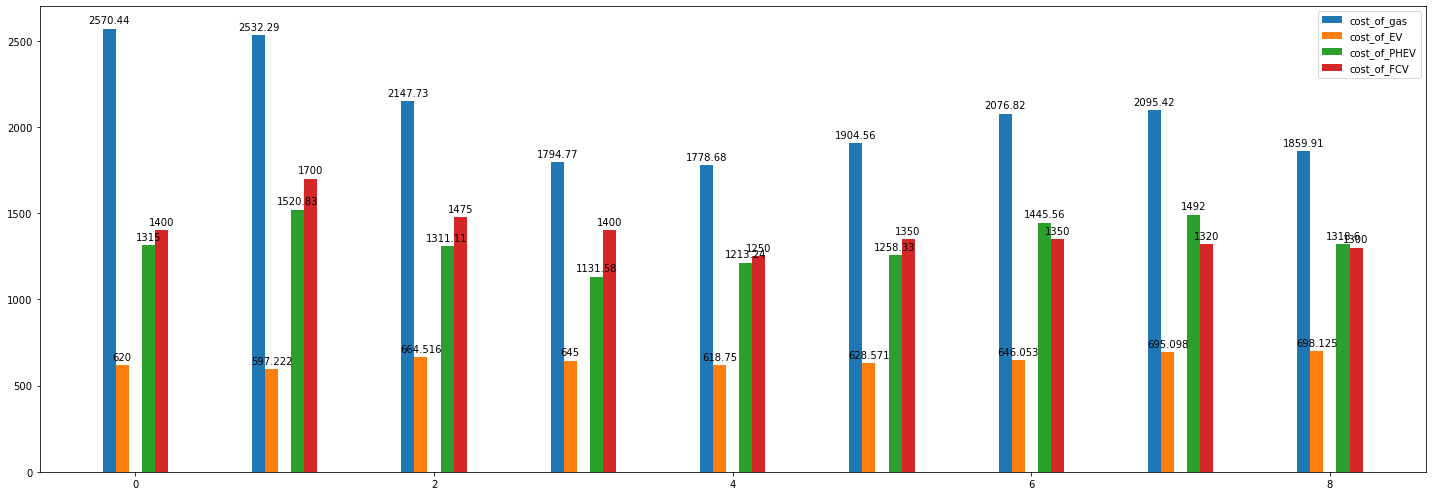

In [32]:
labels =df_save['Year']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,7))
rects1 = ax.bar(x - width/2, df_save['cost_of_gas'], width/4, label='cost_of_gas')
rects2 = ax.bar(x - width/4, df_save['cost_of_EV'], width/4, label='cost_of_EV')
rects3 = ax.bar(x + width/4, df_save['cost_of_PHEV'], width/4, label='cost_of_PHEV')
rects4 = ax.bar(x + width/2, df_save['cost_of_FCV'], width/4, label='cost_of_FCV')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
fig.tight_layout()

ax.legend()

### It can be seen that the consumption of electric vehicles is the lowest and gas the highest.

### We wanted to see how all the new energy vehicles fared compared to gas.

In [33]:
df_save = df_save.round(1)

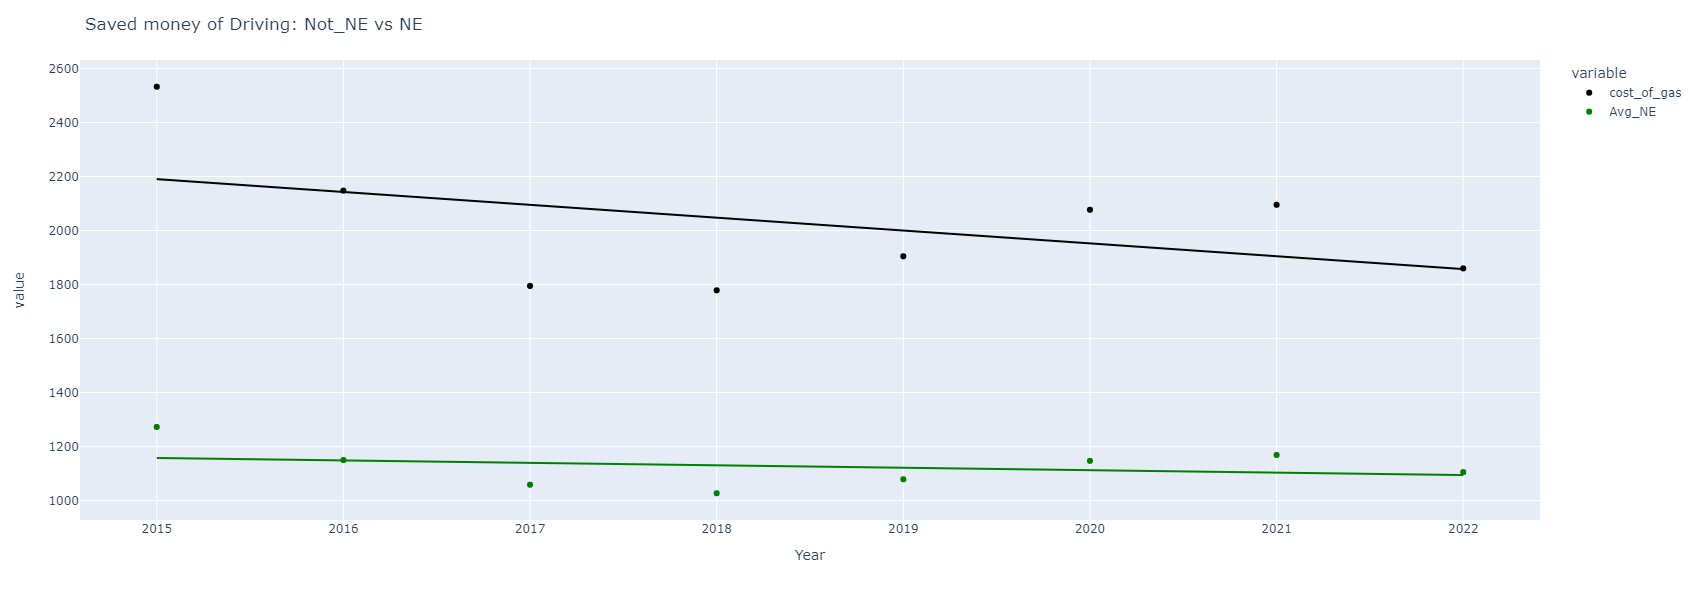

In [34]:
fig = px.scatter(df_save.drop(0), x="Year", y=['cost_of_gas','Avg_NE'],color_discrete_sequence=["black", "green"],trendline='ols')
fig.layout.update(
    width=1000,
    height=600,
    barmode='group',
    title_text = 'Saved money of Driving: Not_NE vs NE')
fig.show()

### The cost of gas is much higher than the cost of new energy sources, but the trend is not so clear. We will remove the older data and select data for 2018-2021.

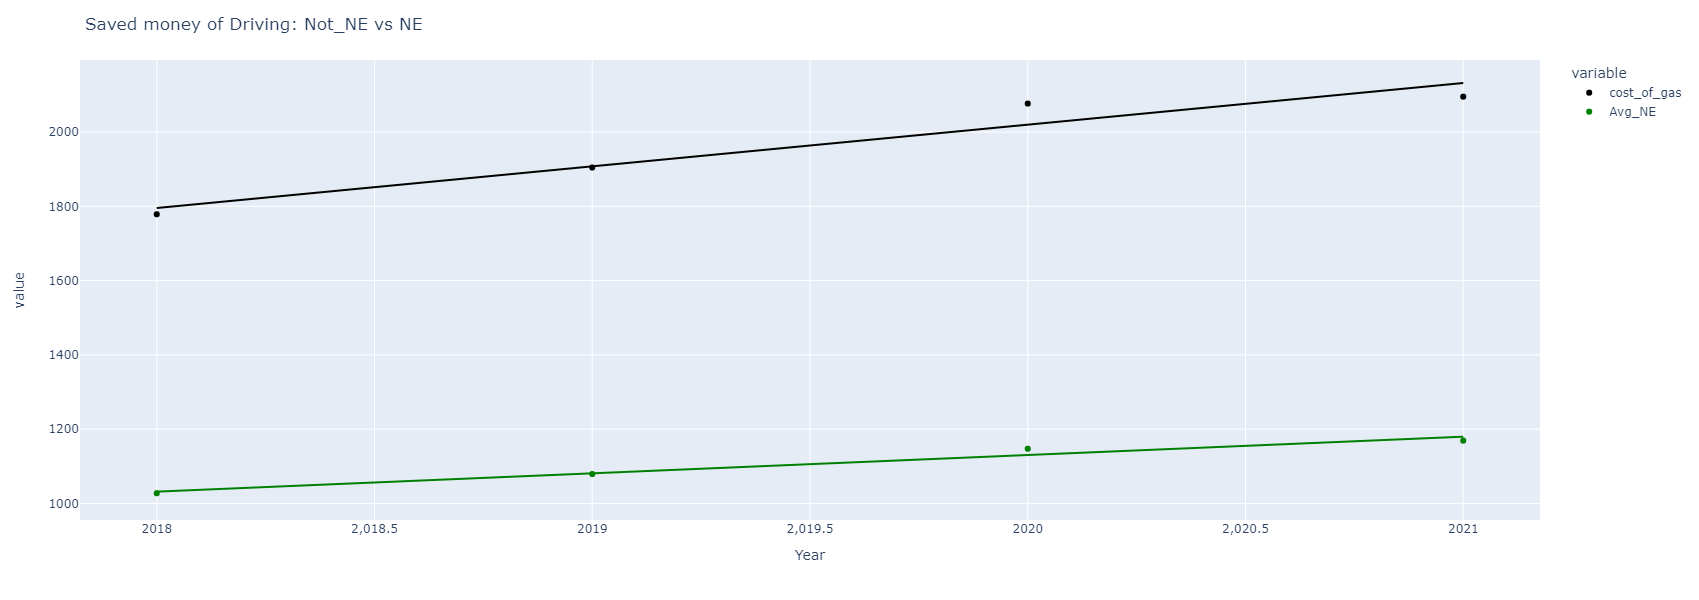

In [35]:
new_save = df_save.loc[~((df_save['Year'] != 2018) & (df_save['Year'] != 2019) & (df_save['Year'] != 2020) & (df_save['Year'] != 2021) ),:]
fig = px.scatter(new_save, x="Year", y=['cost_of_gas','Avg_NE'],color_discrete_sequence=["black", "green"],trendline='ols')
fig.layout.update(
    width=1000,
    height=600,
    barmode='group',
    title_text = 'Saved money of Driving: Not_NE vs NE')
fig.show()

# Combine the actual price of purchasing a car (purchase cost) with the cost of fuel (driving cost).

In [41]:
stacked = df_save

In [46]:
group = group.loc[~((group['Year'] < 2014)),:]

In [47]:
NEV = group.loc[~((group['Fuel_type'] != 'NE') ),:]
NEV.head()

,Year,Fuel_type,Price
32,2014,NE,37266.251701
34,2015,NE,36130.680359
36,2016,NE,38099.428152
38,2017,NE,41550.735814
40,2018,NE,39292.561941


In [48]:
Not_NEV = group.loc[~((group['Fuel_type'] != 'Not_NE') ),:]
Not_NEV.head()

,Year,Fuel_type,Price
33,2014,Not_NE,27895.246257
35,2015,Not_NE,27847.337637
37,2016,Not_NE,28033.217977
39,2017,Not_NE,30434.448172
41,2018,Not_NE,31247.538882


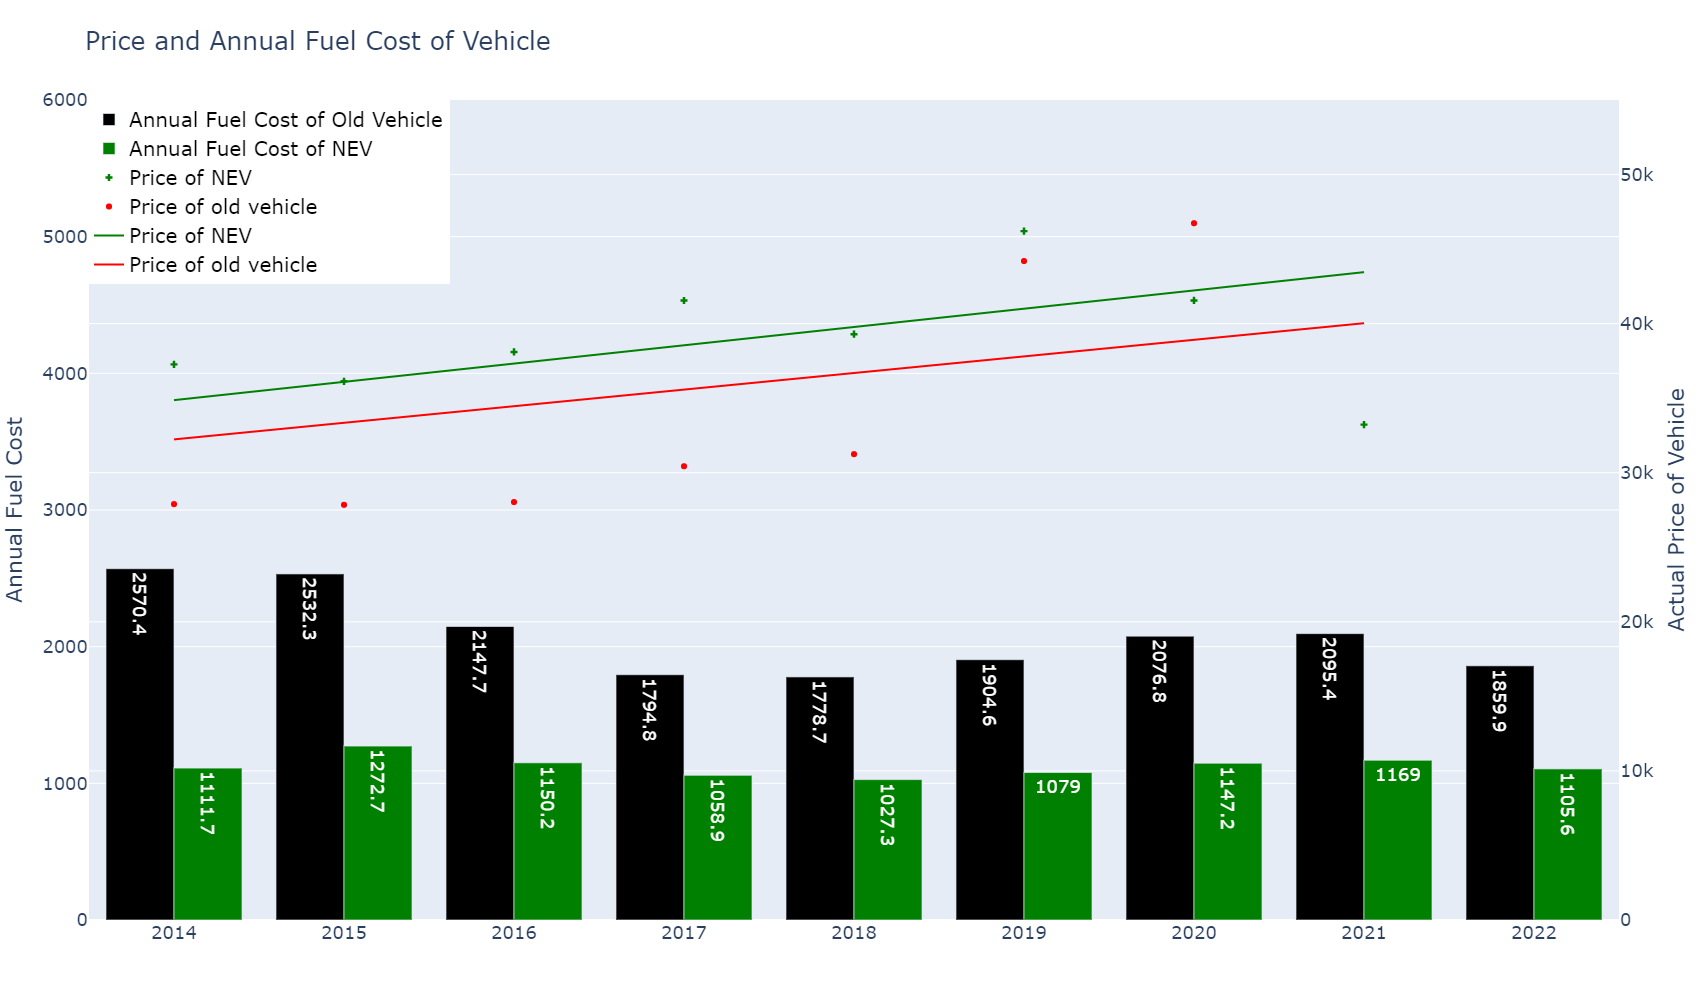

In [49]:
trace0 = go.Bar(x=stacked["Year"], 
                y=stacked['cost_of_gas'], 
                name="Annual Fuel Cost of Old Vehicle", 
                marker_color='black',
               text=stacked['cost_of_gas'])
trace1 = go.Bar(x=stacked["Year"], 
                y=stacked['Avg_NE'], 
                name="Annual Fuel Cost of NEV",
                marker_color='green',
               text=stacked['Avg_NE'])
trace2 = go.Scatter(x=NEV["Year"], 
                    y=NEV["Price"],
                    name="Price of NEV",
                    mode = "markers", marker_color='green',
                    marker_symbol=3,yaxis="y2")
trace3 = go.Scatter(x=Not_NEV["Year"], 
                    y=Not_NEV["Price"], 
                    name="Price of old vehicle",
                    mode = "markers", 
                    marker_color='red',
                    yaxis="y2")
trace4 = go.Scatter(x=NEV["Year"], 
                    y=1226.35*NEV["Year"]+ -2.435e+06, 
                    mode = "lines",name="Price of NEV", 
                    marker_color = "green",
                    yaxis="y2")
trace5 = go.Scatter(x=Not_NEV["Year"], 
                    y=1113.26*Not_NEV["Year"]+ -2.20987e+06, 
                    mode = "lines",
                    name="Price of old vehicle", 
                    marker_color = "red",yaxis="y2")
data1 = [trace0, trace1, trace2, trace3,trace4,trace5]
layout = go.Layout(title="Price and Annual Fuel Cost of Vehicle",
                   font_size=18,
                   yaxis=dict(title="Annual Fuel Cost", range=[0, 6000]),
                   yaxis2=dict(title="Actual Price of Vehicle", overlaying='y', side="right",range=[0, 55000]),
                   legend=dict(x=0, y=1, font=dict(size=20, color="black")))
fig = go.Figure(data=data1, layout=layout)
fig.update_layout(
    width=1700,
    height=1000
)
fig.show()